<a href="https://colab.research.google.com/github/palak178/Machine-Learning/blob/main/Day9/Assignment/House_property_sales_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
!pip install unzip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for unzip: filename=unzip-1.0.0-py3-none-any.whl size=1319 sha256=a233706ce8a126a7c8e66ad1205c6d4d819aa26e2d8b126f12b2c095c6f7a9ae
  Stored in directory: /root/.cache/pip/wheels/c5/05/b3/f7b36dbaaf76de31b718cde792c953bfd11d2414a72f204b56
Successfully built unzip


In [ ]:
!unzip /content/house_property_sales.csv.zip

Archive:  /content/house_property_sales.csv.zip
  inflating: ma_lga_12345.csv        
  inflating: raw_sales.csv           


### Importing the training set

In [ ]:
dataset_train = pd.read_csv('/content/raw_sales.csv')
training_set = dataset_train.iloc[:,2:3].values
dataset_train.head()


,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 20 timesteps and 1 output

In [ ]:
X_train = []
y_train = []
for i in range(20, 1258):
    X_train.append(training_set_scaled[i-20:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [ ]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [ ]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [ ]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
39/39 [==============================] - 8s 42ms/step - loss: 8.8700e-04
Epoch 2/100
39/39 [==============================] - 2s 43ms/step - loss: 7.4550e-04
Epoch 3/100
39/39 [==============================] - 2s 43ms/step - loss: 7.4372e-04
Epoch 4/100
39/39 [==============================] - 2s 44ms/step - loss: 7.5085e-04
Epoch 5/100
39/39 [==============================] - 2s 43ms/step - loss: 7.4422e-04
Epoch 6/100
39/39 [==============================] - 2s 43ms/step - loss: 7.4424e-04
Epoch 7/100
39/39 [==============================] - 2s 42ms/step - loss: 7.3875e-04
Epoch 8/100
39/39 [==============================] - 2s 42ms/step - loss: 7.4832e-04
Epoch 9/100
39/39 [==============================] - 2s 43ms/step - loss: 7.4800e-04
Epoch 10/100
39/39 [==============================] - 2s 44ms/step - loss: 7.3505e-04
Epoch 11/100
39/39 [==============================] - 2s 42ms/step - loss: 7.2727e-04
Epoch 12/100
39/39 [==============================] - 2s 43ms/s

## Part 3 - Making the predictions and visualising the results

### Getting the real House property sales

In [ ]:
dataset_test = pd.read_csv('/content/ma_lga_12345.csv')
real_property_sales = dataset_test.iloc[:, 2:3].values
dataset_test.head()

,saledate,MA,type,bedrooms
0,30/09/2007,441854,house,2
1,31/12/2007,441854,house,2
2,31/03/2008,441854,house,2
3,30/06/2008,441854,house,2
4,30/09/2008,451583,house,2


### Getting the predicted House property sales

In [ ]:
dataset_total = pd.concat((dataset_train['price'], dataset_test['MA']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 20:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(20, 80):
    X_test.append(inputs[i-20:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_property_sales = regressor.predict(X_test)
predicted_property_sales = sc.inverse_transform(predicted_property_sales)

### Visualising the results

TypeError: ignored

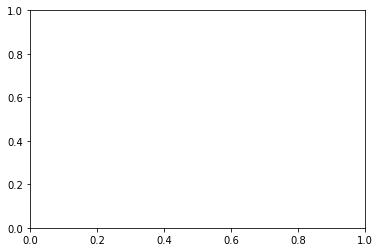

In [ ]:
plt.plot(real_property_sales, color = 'red', label = 'Real House property sales')
plt.plot(predicted_property_sales, color = 'blue', label = 'Predicted House property sales ')
plt.title('House property sales Prediction')
plt.xlabel('Time')
plt.ylabel('House property sales')
plt.legend()
plt.show()